# Model 1

XGB Boost Model

In [144]:
! pip install -r requirements.txt

In [145]:
#
# basics
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_palette('magma')
from sklearn.model_selection import train_test_split


# warnings
import warnings
warnings.filterwarnings('ignore')

RSEED = 42

# EDA

In [146]:
# load training data
df = pd.read_csv('data/Train.csv')

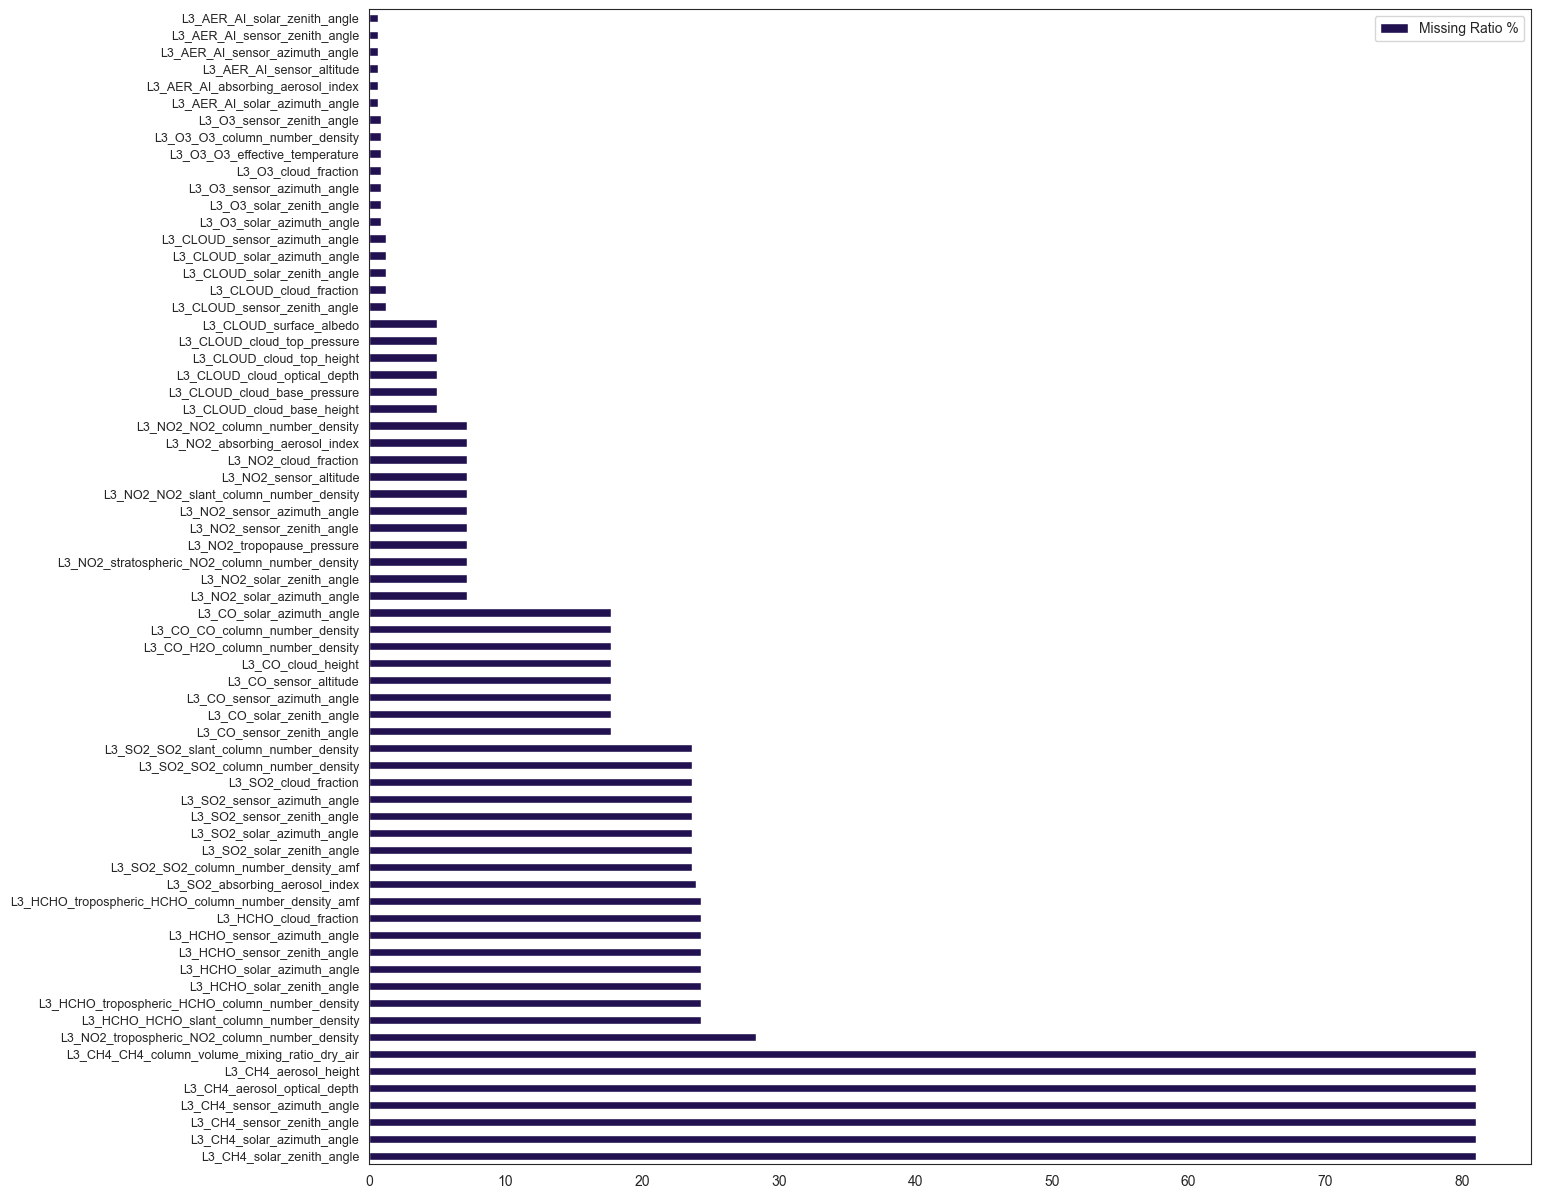

In [147]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)
plot_width, plot_height = (15,15)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plt.rcParams['ytick.labelsize'] = 9

In [148]:
# drop columns with more than 50% missing values
check_ch4 = [col for col in df.columns if 'CH4' in col]
df.drop(columns=check_ch4, axis=1, inplace=True)

In [149]:
df.drop(columns= ['Place_ID', 'Place_ID X Date'], axis=1, inplace=True)

In [150]:
df.shape

(30557, 73)

In [151]:
# Convert to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Create integer column for weekends
df["IsWeek"] = (df["Date"].dt.weekday < 5).astype(int)

In [152]:
df.drop(columns=['Date', 'target_min', 'target_max', 'target_variance', 'target_count'], axis=1, inplace=True)

In [153]:
df.head(5)

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,...,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,IsWeek
0,38.0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,...,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1
1,39.0,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,...,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1
2,24.0,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,...,0.000150,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977,0
3,49.0,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,...,0.000227,0.584522,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446,0
4,21.0,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.366323,...,0.000390,0.408047,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694,1


In [154]:
! pip install missingno
import missingno as msno

<Axes: >

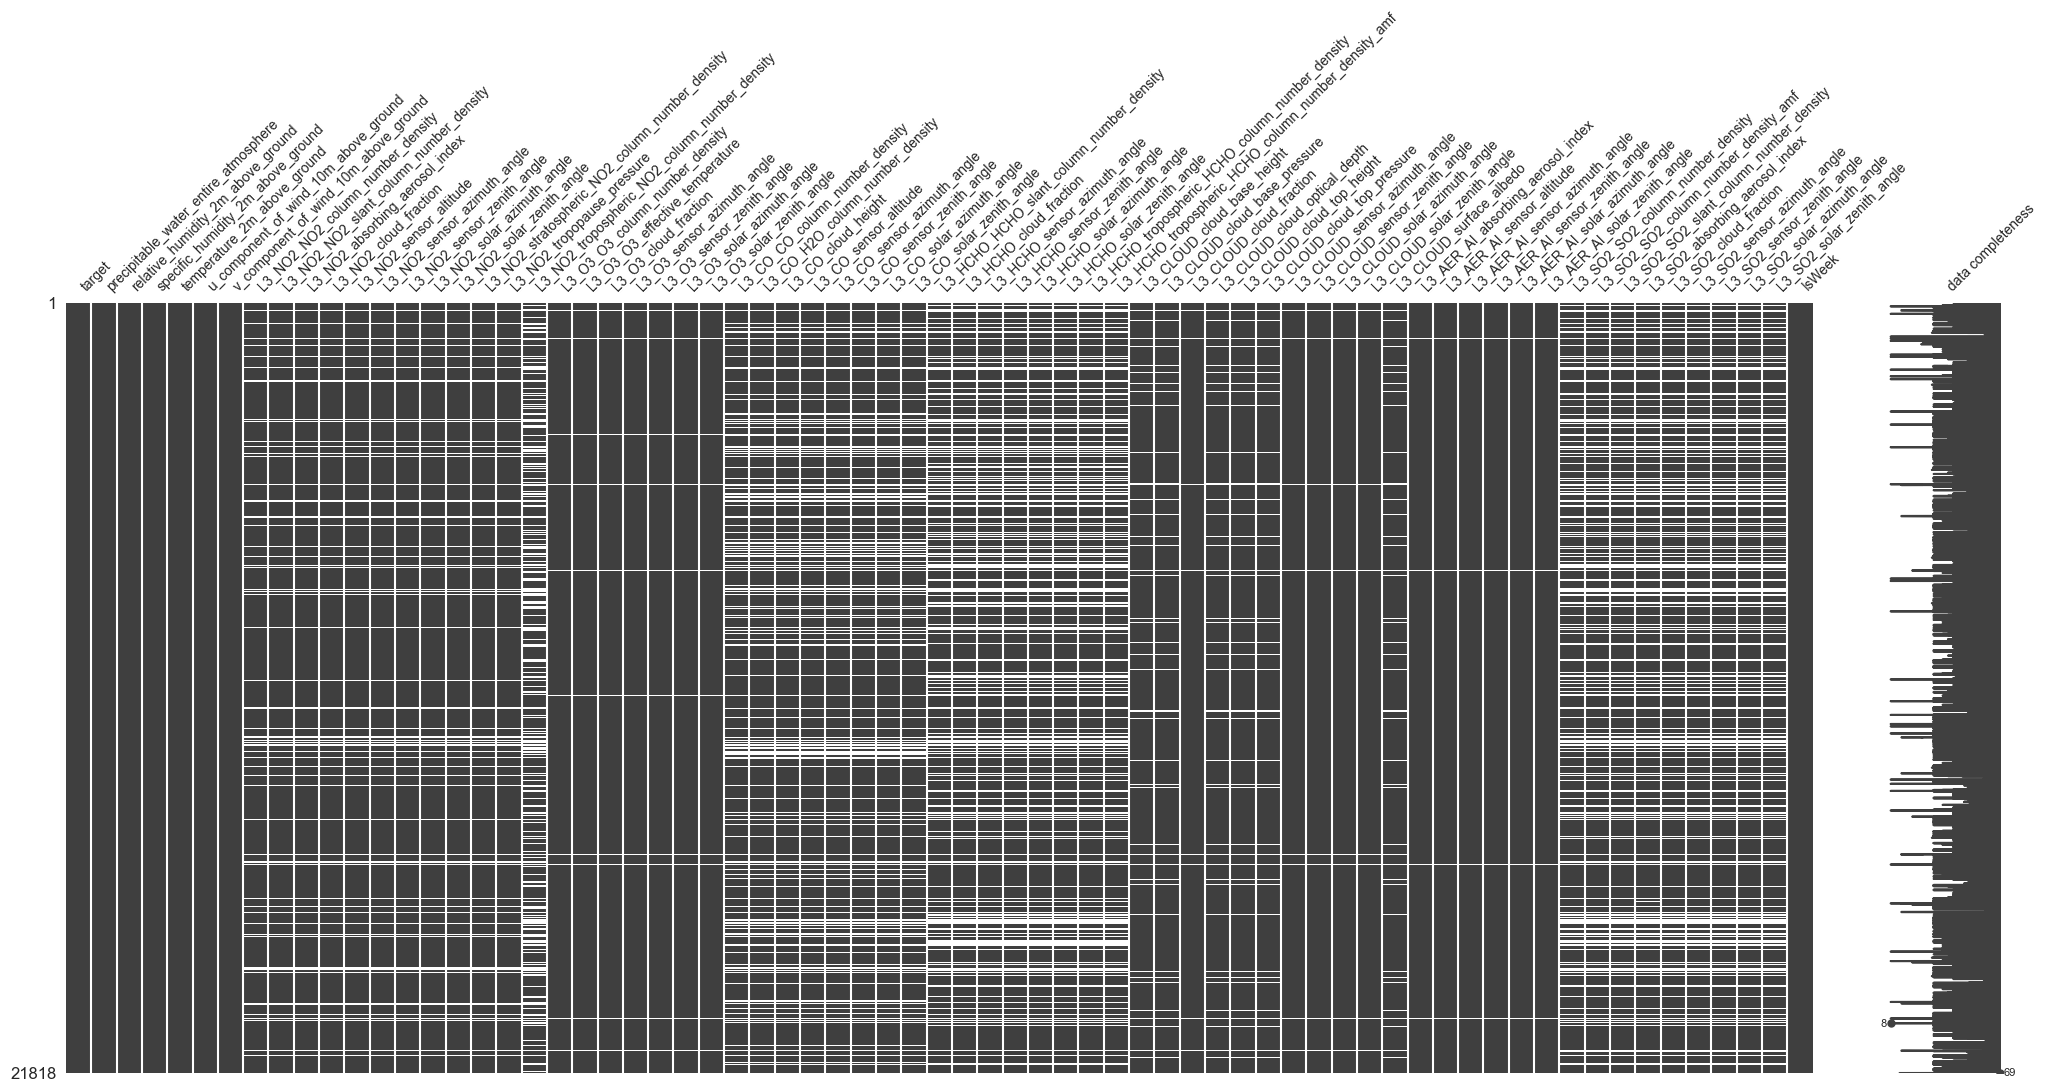

In [155]:
msno.matrix(df.query('IsWeek == 1'), fontsize=10,labels=True)

<Axes: >

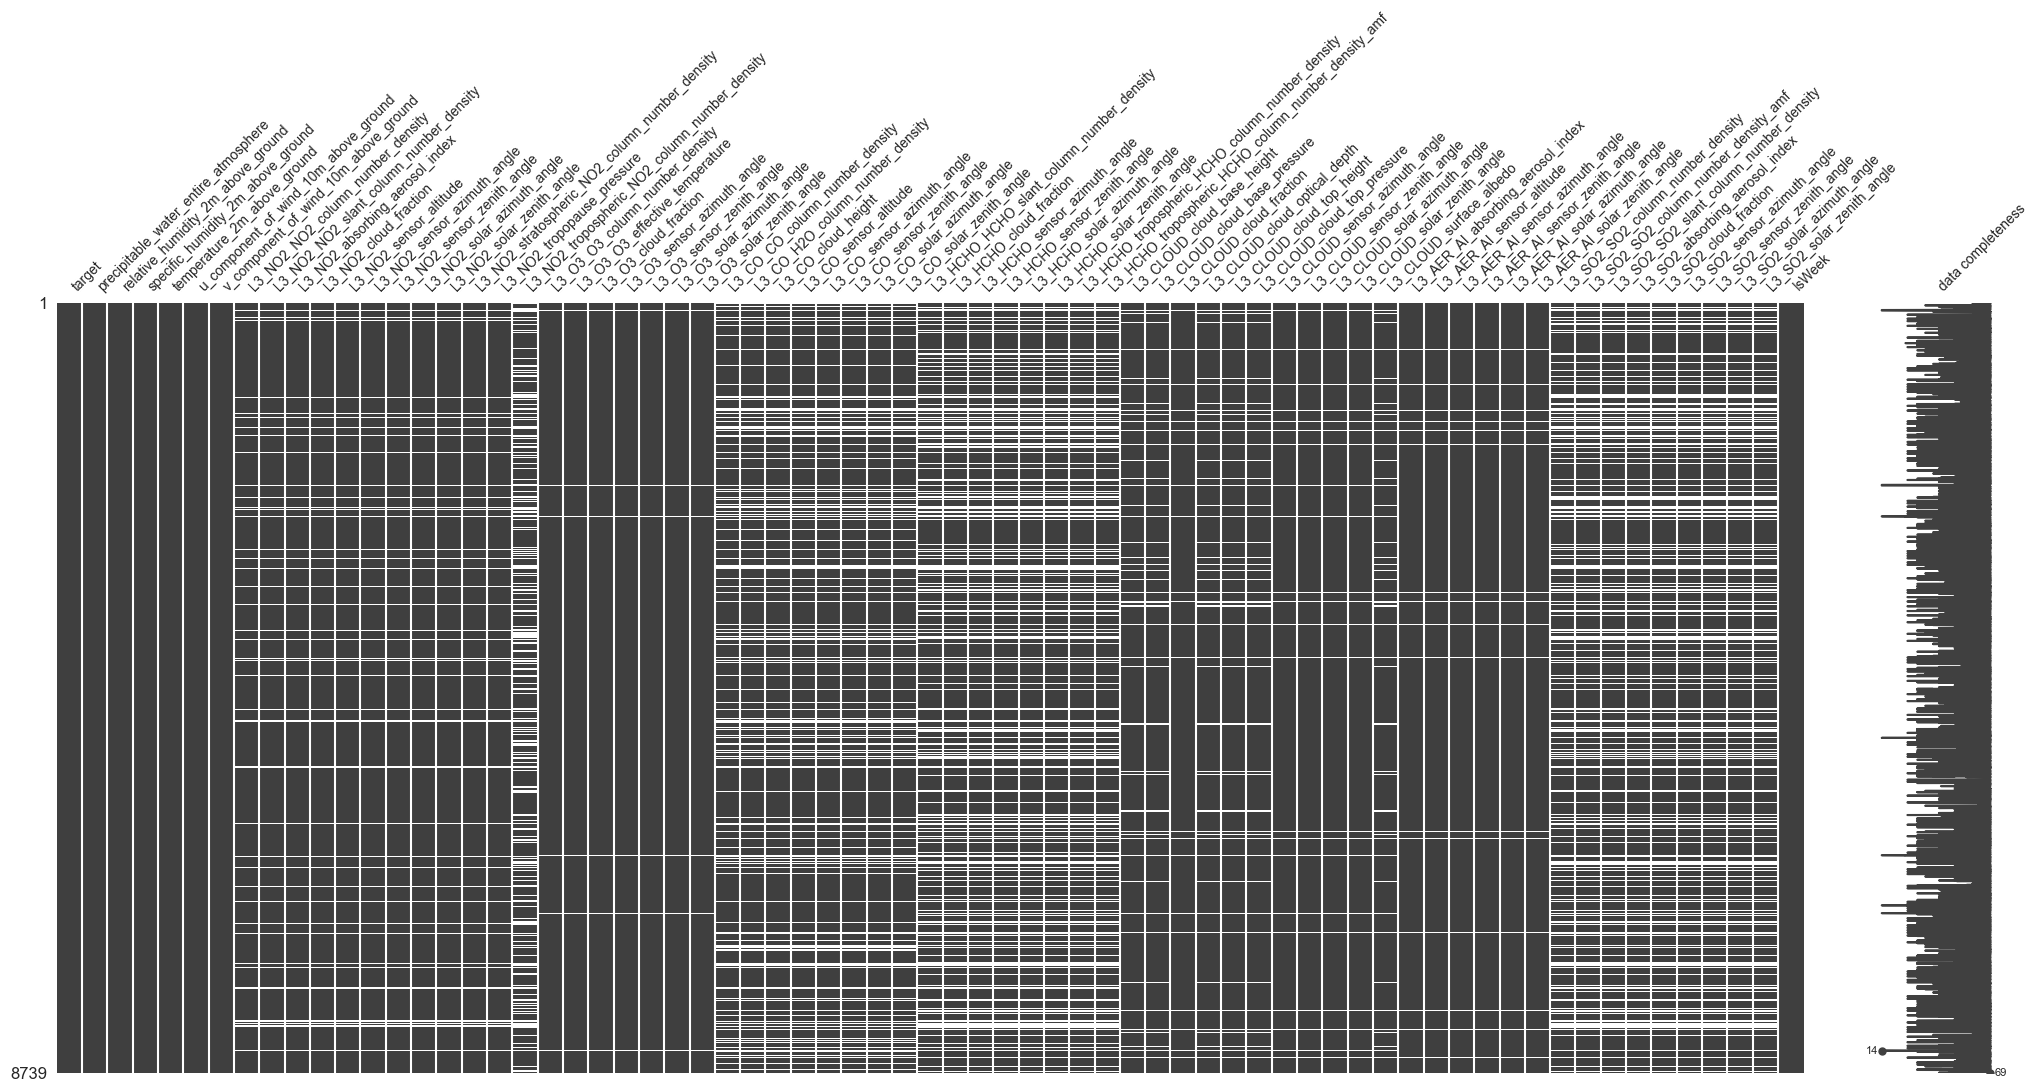

In [156]:
msno.matrix(df.query('IsWeek == 0'), fontsize=10,labels=True)

In [157]:
variables_list = [
    "L3_NO2_NO2_column_number_density",
    "L3_NO2_NO2_slant_column_number_density",
    "L3_NO2_sensor_altitude",
    "L3_NO2_tropopause_pressure",
    "L3_NO2_solar_zenith_angle",
    "L3_SO2_SO2_column_number_density",
    "L3_SO2_SO2_column_number_density_amf",
    "L3_SO2_SO2_slant_column_number_density",
    "L3_SO2_solar_zenith_angle",
    "L3_O3_O3_column_number_density",
    "L3_O3_O3_effective_temperature",
    "L3_O3_solar_zenith_angle",
    "L3_CO_CO_column_number_density",
    "L3_CO_sensor_altitude",
    "L3_CO_solar_zenith_angle",
    "L3_HCHO_solar_zenith_angle",
    "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
]

In [158]:
df[variables_list].replace(0, np.nan, inplace=True)

<Axes: >

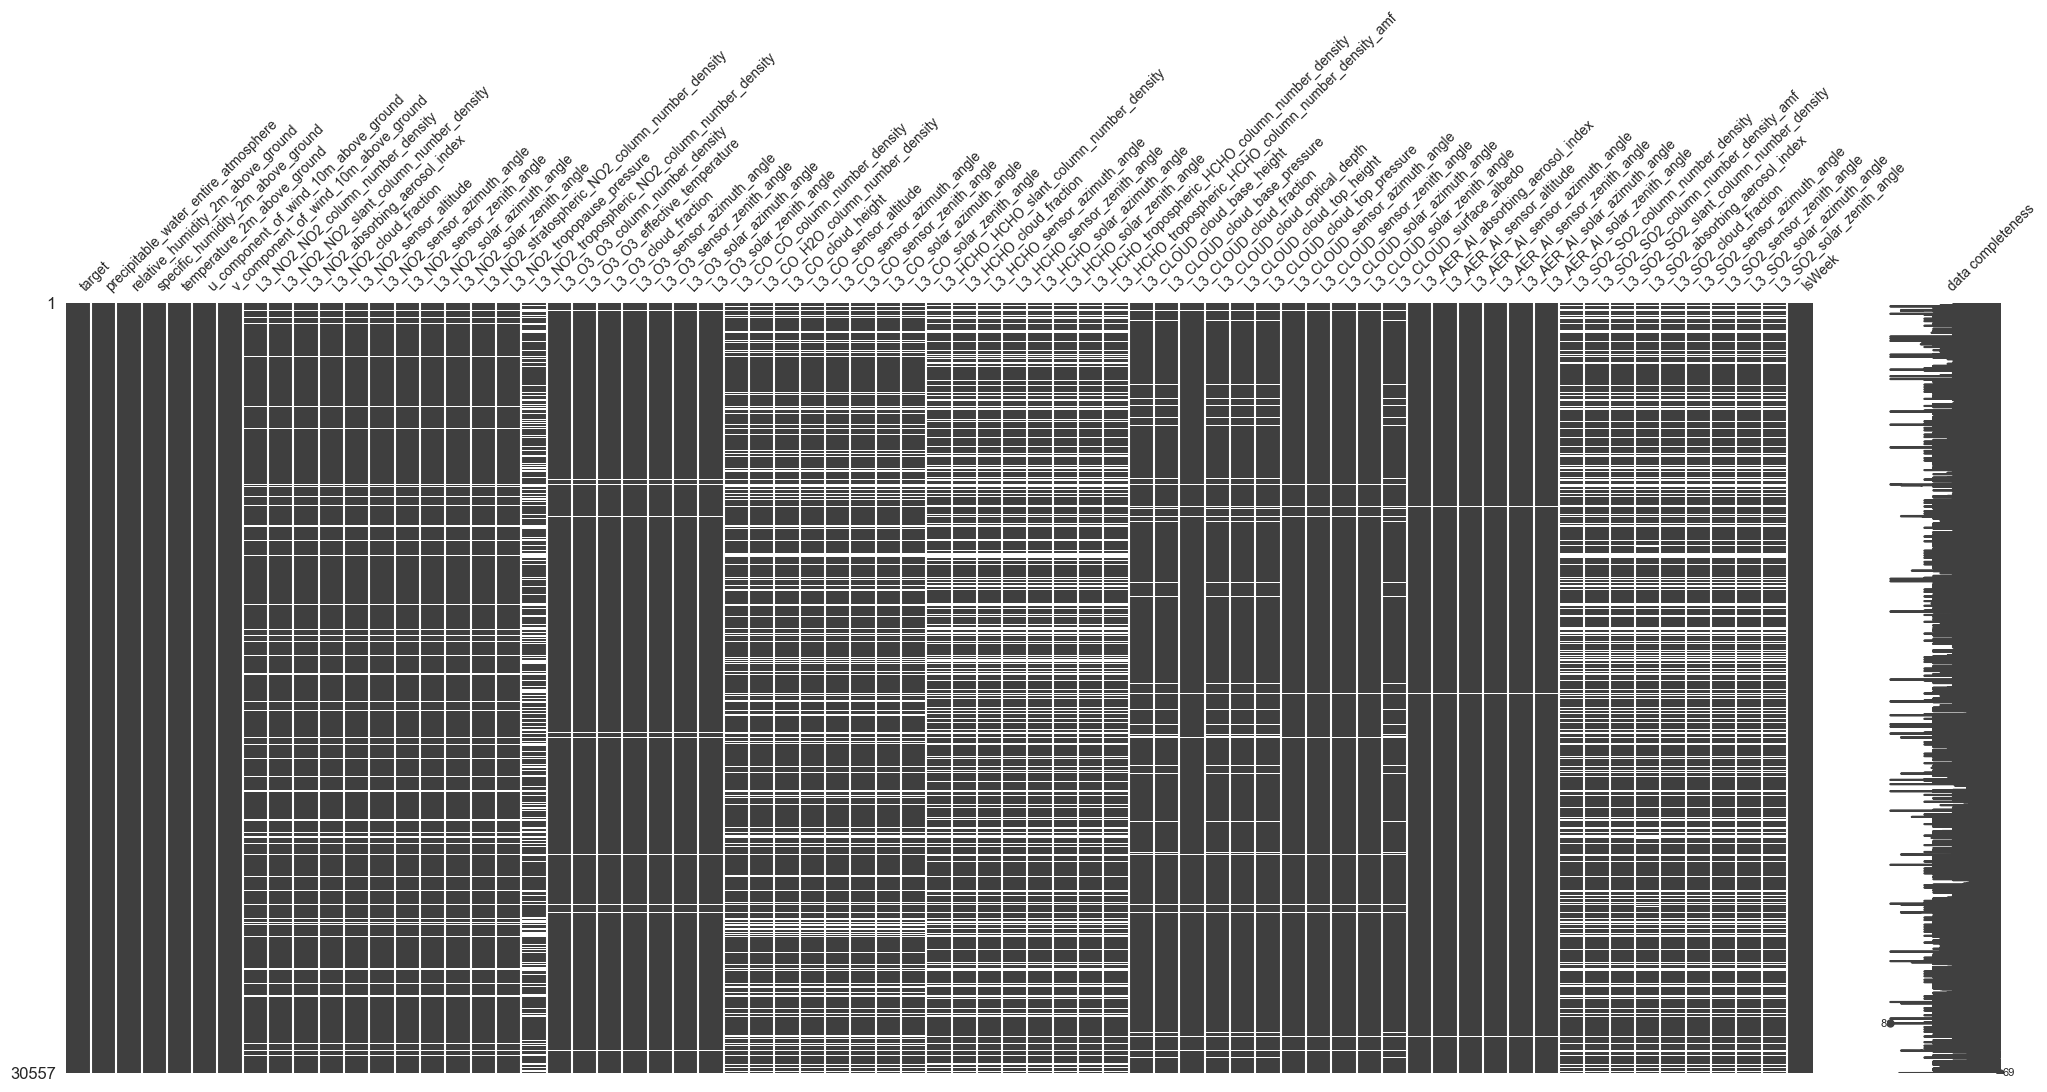

In [160]:
msno.matrix(df, fontsize=10,labels=True)

In [161]:
from xgboost import XGBClassifier